### Logistics Regression on diabebtes Dataset

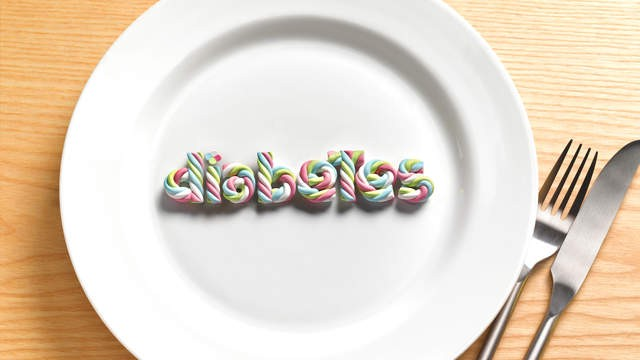

In [1]:
# import libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# loading Dataset
df = pd.read_csv("C:/Users/NOOMAN KHAN/Downloads/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The following features have been provided to help us predict whether a person is diabetic or not:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes

based on family history)

Age: Age (years)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# nulls
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

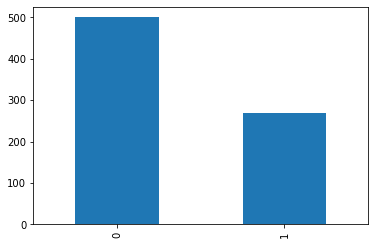

In [10]:
df["Outcome"].value_counts().plot.bar()
plt.show()

In [12]:
# descriptive statics of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


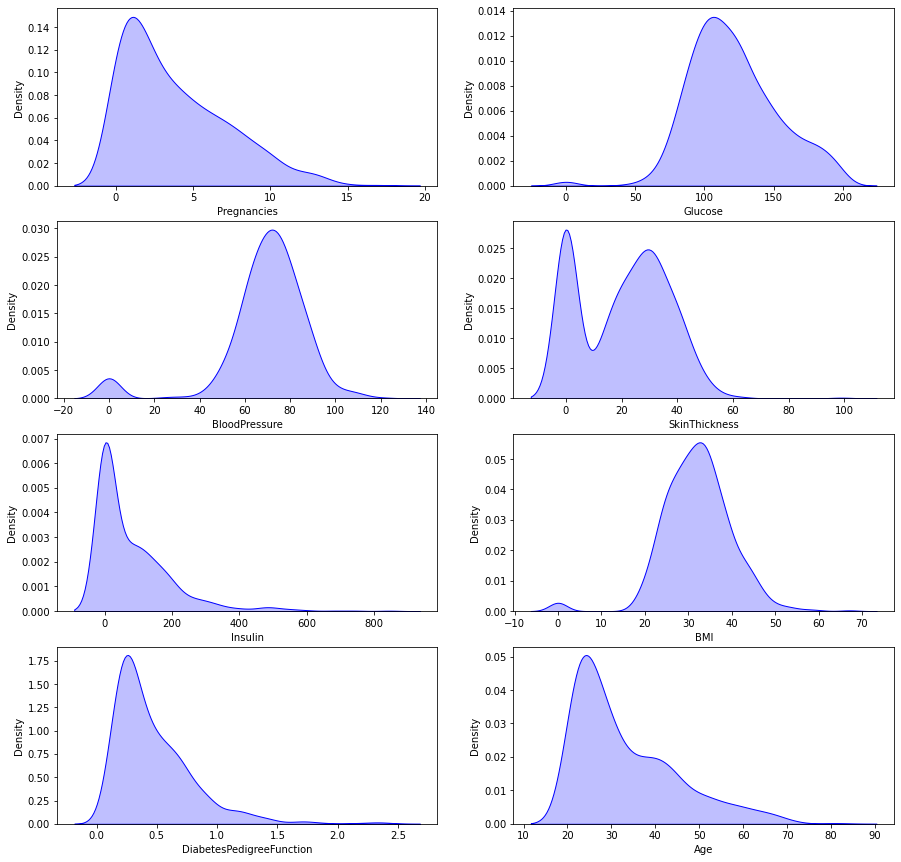

In [26]:
#distribution of data
fig , ax = plt.subplots(4 , 2 ,figsize = (15,15))
column = df.iloc[:,:-1].columns
index = 0
for i in range(4):
    for j in range(2):
        sns.kdeplot(x = df[column[index]], fill = True ,color = "blue", ax = ax[i][j])
        index+=1

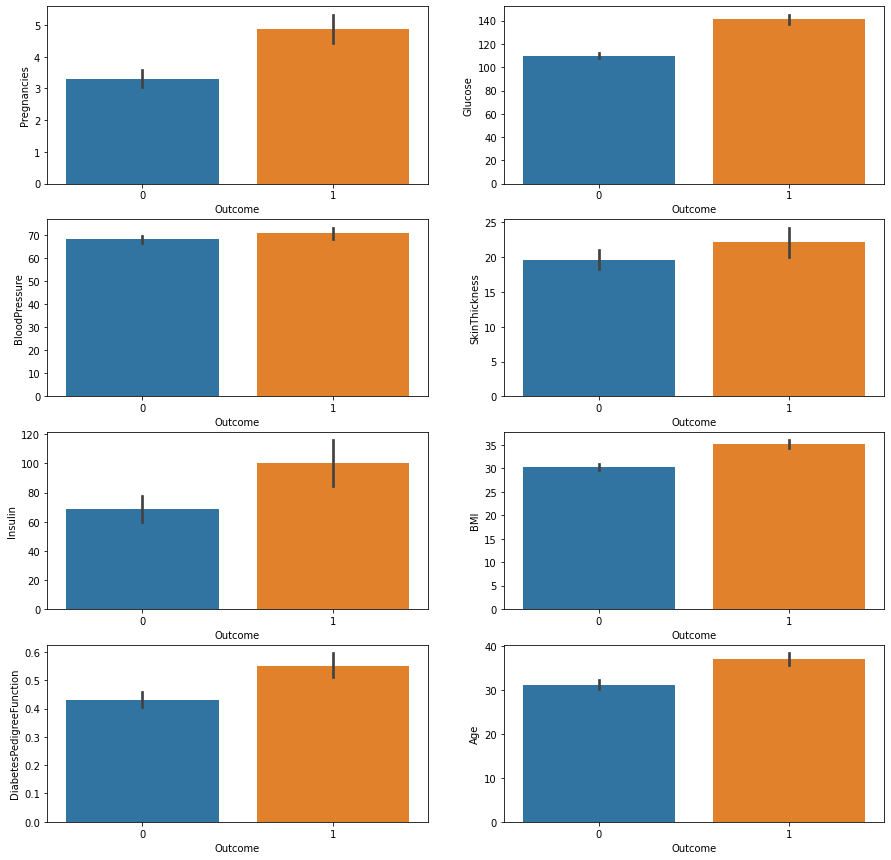

In [27]:
# barplot
fig , ax = plt.subplots(4 , 2 ,figsize = (15,15))
column = df.iloc[:,:-1].columns
index = 0
for i in range(4):
    for j in range(2):
        sns.barplot(y = df[column[index]]  , x = df["Outcome"] , ax = ax[i][j])
        index+=1

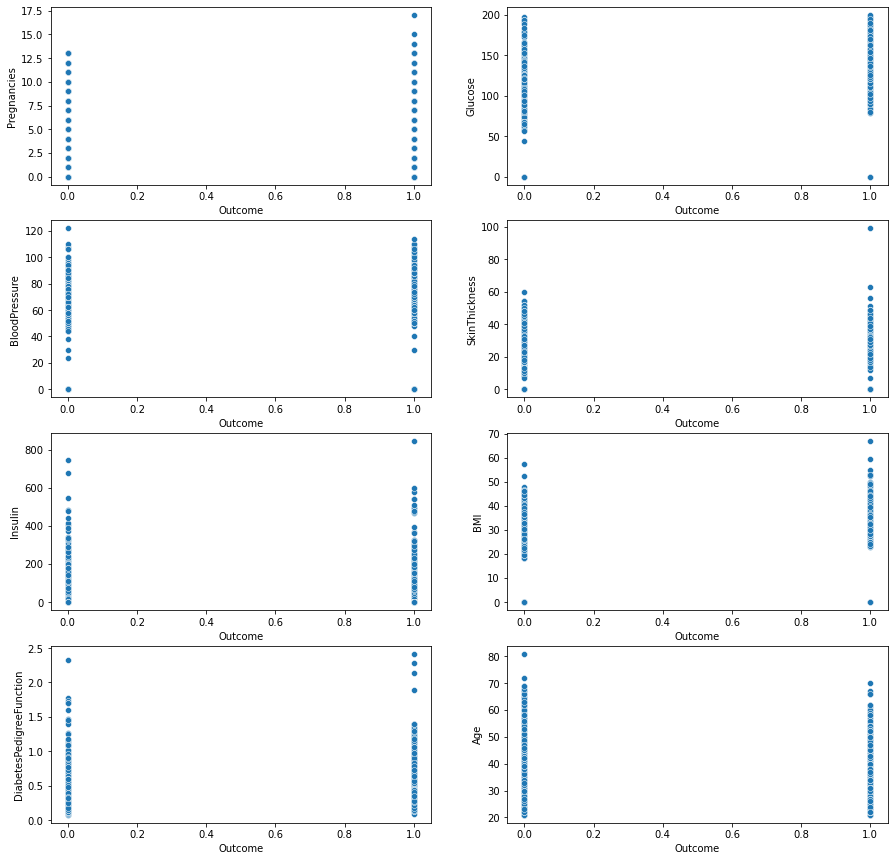

In [25]:
# scatterplt
fig , ax = plt.subplots(4 , 2 ,figsize = (15,15))
column = df.iloc[:,:-1].columns
index = 0
for i in range(4):
    for j in range(2):
        sns.scatterplot(y = df[column[index]]  , x = df["Outcome"] , ax = ax[i][j])
        index+=1

<AxesSubplot:>

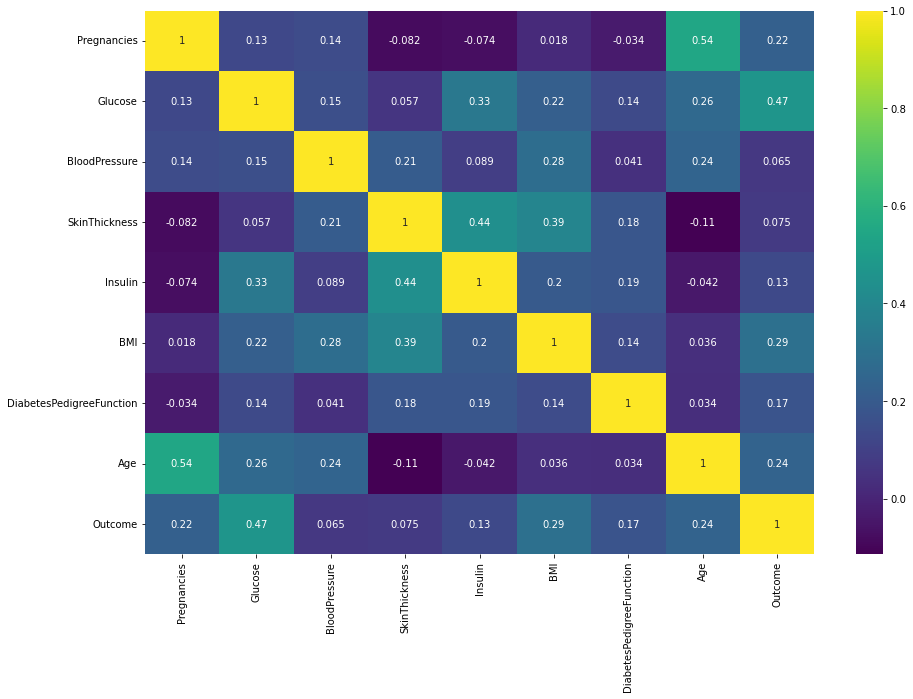

In [32]:
# correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(df.corr() , annot = True , cmap = "viridis")

In [38]:
X = df.drop("Outcome" , axis = 1).values
Y = df[["Outcome"]].values

In [39]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size =0.2,random_state = 42)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 42)
lg.fit(X_train , Y_train.ravel())

LogisticRegression(random_state=42)

In [44]:
Y_pred = lg.predict(X_test)

In [45]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [47]:
from sklearn import metrics 
cmf_metrics = metrics.confusion_matrix(Y_test , Y_pred)
cmf_metrics

array([[79, 20],
       [18, 37]], dtype=int64)

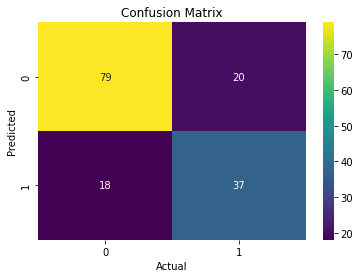

In [55]:
sns.heatmap(cmf_metrics, annot = True , cmap = "viridis")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()


In [59]:
from sklearn.metrics import classification_report
 
print(classification_report(Y_test, Y_pred ))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [88]:
metrics.accuracy_score(Y_test , Y_pred)

0.7532467532467533

In [89]:
len(Y_pred)

154

In [133]:
Y_proba = lg.predict_proba(X_test)


In [134]:
Y_proba

array([[0.72266096, 0.27733904],
       [0.814001  , 0.185999  ],
       [0.88530446, 0.11469554],
       [0.82858544, 0.17141456],
       [0.53163824, 0.46836176],
       [0.56014792, 0.43985208],
       [0.98379941, 0.01620059],
       [0.34046861, 0.65953139],
       [0.46390547, 0.53609453],
       [0.22953047, 0.77046953],
       [0.74606432, 0.25393568],
       [0.10866417, 0.89133583],
       [0.66716096, 0.33283904],
       [0.6871282 , 0.3128718 ],
       [0.91462105, 0.08537895],
       [0.61368987, 0.38631013],
       [0.86056047, 0.13943953],
       [0.92343534, 0.07656466],
       [0.14221802, 0.85778198],
       [0.44478728, 0.55521272],
       [0.79159551, 0.20840449],
       [0.92089785, 0.07910215],
       [0.46883498, 0.53116502],
       [0.90453225, 0.09546775],
       [0.46506696, 0.53493304],
       [0.12017011, 0.87982989],
       [0.87551711, 0.12448289],
       [0.9689376 , 0.0310624 ],
       [0.75195035, 0.24804965],
       [0.88049326, 0.11950674],
       [0.

In [141]:
Y_proba = Y_proba[::,1]


In [ ]:
Y_

In [142]:
len(Y_proba)

154

In [85]:
len(Y_test)

154

In [92]:

fpr, tpr, _ = metrics.roc_curve(Y_test.ravel(),  Y_proba)

The Fbeta-measure is calculated using precision and recall.

Precision is a metric that calculates the percentage of correct predictions for the positive class. Recall calculates the percentage of correct predictions for the positive class out of all positive predictions that could be made. Maximizing precision will minimize the false-positive errors, whereas maximizing recall will minimize the false-negative errors.

The F-measure is calculated as the harmonic mean of precision and recall, giving each the same weighting. It allows a model to be evaluated taking both the precision and recall into account using a single score, which is helpful when describing the performance of the model and in comparing models.

The Fbeta-measure is a generalization of the F-measure that adds a configuration parameter called beta. A default beta value is 1.0, which is the same as the F-measure. A smaller beta value, such as 0.5, gives more weight to precision and less to recall, whereas a larger beta value, such as 2.0, gives less weight to precision and more weight to recall in the calculation of the score.

It is a useful metric to use when both precision and recall are important but slightly more attention is needed on one or the other, such as when false negatives are more important than false positives, or the reverse.

In this tutorial, you will discover the Fbeta-measure for evaluating classification algorithms for machine learning.

After completing this tutorial, you will know:

Precision and recall provide two ways to summarize the errors made for the positive class in a binary classification problem.
F-measure provides a single score that summarizes the precision and recall.
Fbeta-measure provides a configurable version of the F-measure to give more or less attention to the precision and recall measure when calculating a single score.

In [144]:
auc = metrics.roc_auc_score(Y_test, Y_proba)

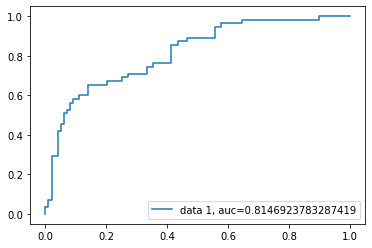

In [145]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## ROC CURVE


Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity

I applied predict_proba on classfication problem. Its giving a list of 2 outputs for each observation(row) as below.

[0.23780654318010663, 0.7621934568198934]

What does this mean?

Does it mean, the probability of occurance of 0 is 0.237… and 1 is 0.762…?

## Nooman Khan

In [96]:
print("Nooman Khan")

Nooman Khan


When AUC is approximately 0, the model is actually reciprocating the classes. It means the model is predicting a negative class as a positive class and vice versa.